In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('metadata.csv').drop('SNo', axis=1)

,Column name,Details
0,Status,credit status
1,Seniority,job seniority (years)
2,Home,type of home ownership
3,Time,time of requested loan
4,Age,client's age
5,Marital,marital status
6,Records,existance of records
7,Job,type of job
8,Expenses,amount of expenses
9,Income,amount of income


In [3]:
df_all = pd.read_csv('CreditScoring.csv')
df_raw = pd.read_csv('CleanCreditScoring.csv')

In [4]:
df_all.columns = df_all.columns.str.lower()
df_raw.columns = df_raw.columns.str.lower()

In [5]:
df_all.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df = df_all.copy()

In [7]:
categorical_cols = ['status', 'home', 'marital', 'records', 'job']

In [8]:
for col in categorical_cols:
    print(col, df[col].unique())
    print()

status [1 2 0]

home [1 2 5 3 6 4 0]

marital [2 3 1 4 5 0]

records [1 2]

job [3 1 2 0 4]



In [9]:
col_maps = {
    "status": {
        1: "ok",
        2: "default",
        0: "unk"
    },
    "home": {
        1: "rent",
        2: "owner", 
        3: "private", 
        4: "ignore", 
        5: "parents", 
        6: "other",
        0: "unk"
    },
    "marital": {
        1: "single",
        2: "married",
        3: "widow",
        4: "separated",
        5: "divorced",
        0: "unk"
    },
    "records": {
        1: "no",
        2: "yes"
    },
    "job": {
        1: "fixed",
        2: "partime",
        3: "freelance",
        4: "others",
        0: "unk"
    }
}

for col in col_maps.keys():
    df[col] = df[col].map(col_maps[col])

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999.0, value=0)

In [13]:
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,130.0,5346.0,342.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,87.0,11525.0,1244.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,119.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Split data

In [18]:
full_train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train, val = train_test_split(full_train, test_size=0.25, random_state=42, shuffle=True)

In [19]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [20]:
y_train = (train.status == 'default').astype(int)
y_val = (val.status == 'default').astype(int)
y_test = (test.status == 'default').astype(int)

In [21]:
del train['status']
del val['status']
del test['status']

### Train model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text, plot_tree

In [24]:
train_dicts = train.fillna(0).to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val  = dv.transform(val.to_dict(orient='records'))
X_test  = dv.transform(test.to_dict(orient='records'))

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_val_prob = dt.predict_proba(X_val)[:,1]

In [28]:
roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])

0.6567626548938945

In [29]:
roc_auc_score(y_val, y_val_prob)

0.6567626548938945

In [30]:
y_test_prob = dt.predict_proba(X_test)[:,1]

In [31]:
roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])

0.9999996473061242

This is Overfitting because 

#### With Depth

In [34]:
dt = DecisionTreeClassifier(max_depth=2 )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

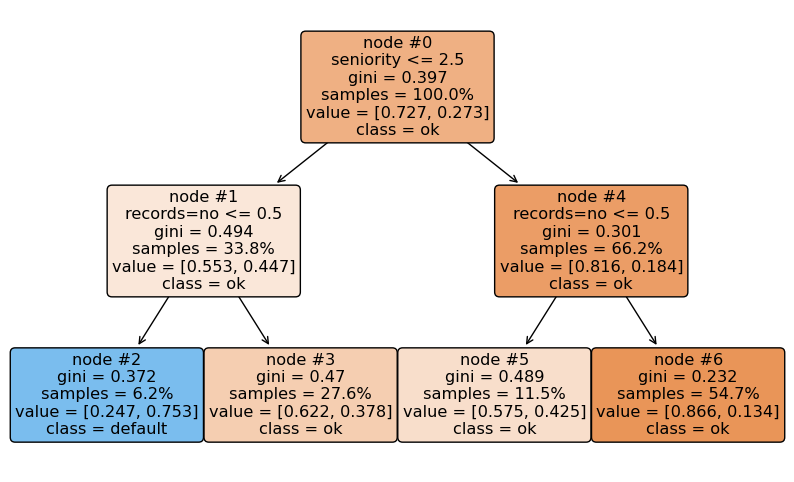

In [35]:
plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=dv.get_feature_names_out().tolist(), filled=True, proportion=True, node_ids= True, rounded=True, class_names=['ok', 'default'])
plt.show()

In [36]:
y_val_prob = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, dt.predict_proba(X_val)[:,1]), roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])

(0.7128913108914865, 0.7175133670978937)

In [37]:
from tqdm.auto import tqdm

  0%|          | 0/30 [00:00<?, ?it/s]

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

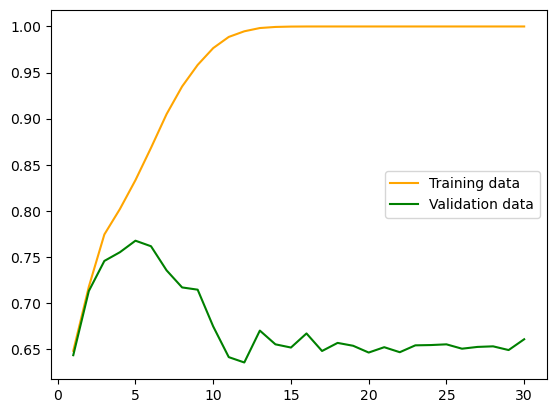

Best depth is d = 5 with val score = 0.7675211960066222 and train score = 0.8332410451024929


In [38]:
n = 30
steps = 1
ds = []
val_scores = []
train_scores = []
model_depths = []

best_depth = 0
max_auc_scores = (0,0);

for d in tqdm(range(1, n+1, steps), total=int(n/steps)):
    ds.append(d)
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    model_depths.append(dt.get_depth())
    y_val_prob = dt.predict_proba(X_val)[:,1]
    val_auc_score = roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])
    train_auc_score = roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])
    if max_auc_scores[0] <= val_auc_score:
        best_depth, max_auc_scores = d, (val_auc_score, train_auc_score)
    val_scores.append(val_auc_score)
    train_scores.append(train_auc_score)

sns.lineplot(x=ds, y=train_scores, color = 'orange', label="Training data")
sns.lineplot(x=ds, y=val_scores, color = 'green', label="Validation data")
# sns.lineplot(x=ds, y=model_depths, color = 'grey', label="Validation data")
plt.show()

df_scores = pd.DataFrame()
df_scores['Depth'] = ds
df_scores['Val_scores'] = val_scores
df_scores['Train Scores'] = train_scores
df_scores['Model Depths'] = model_depths

print(f"Best depth is d = {best_depth} with val score = {max_auc_scores[0]} and train score = {max_auc_scores[1]}")

### Decision tree algorithm

In [40]:
from IPython.display import display

In [41]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]
data = [
    [700, 2.1, "ok"],
    [100, 3, "default"],
    [2000, 4, "ok"],
    [0, 3.5, "default"],
    [500, 3, "ok"],
    [200, 2.2, "default"],
    [1000, 2, "default"],
    [1100, 1, "default"],
    [1500, 4.5, "default"],
    [1700, 5, "ok"],
]
example_df = pd.DataFrame(data, columns=["assets", "debt", "status"])
display(example_df.sort_values('assets', ascending=True)[["assets", "status"]])
display(example_df.sort_values('debt', ascending=True)[["debt", "status"]])

,assets,status
3,0,default
1,100,default
5,200,default
4,500,ok
0,700,ok
6,1000,default
7,1100,default
8,1500,default
9,1700,ok
2,2000,ok


,debt,status
7,1.0,default
6,2.0,default
0,2.1,ok
5,2.2,default
1,3.0,default
4,3.0,ok
3,3.5,default
2,4.0,ok
8,4.5,default
9,5.0,ok


In [42]:
for col in ['assets', 'debt']:
    uq = example_df[col].unique().tolist()
    uq.sort()

    impurities = []
    Ts = []
    for i in range(1,len(uq)):
        T = (uq[i-1]+uq[i])/2
        #T=uq[i - 1]
        Ts.append(T)
        left_part = example_df[example_df[col] <= T]
        right_part = example_df[example_df[col] > T]

        left_impuirity = 0 if not left_part.status.value_counts(normalize=True).__contains__("ok") else left_part.status.value_counts(normalize=True)['ok']
        right_impuirity = 0 if not right_part.status.value_counts(normalize=True).__contains__("default") else right_part.status.value_counts(normalize=True)['default']
        avg_impurity = (len(left_part)*left_impuirity + len(right_part)*right_impuirity)/(len(left_part)+len(right_part))
        impurities.append([left_impuirity, right_impuirity, avg_impurity])

    impurity_df = pd.DataFrame(impurities, columns=['left_impu', 'right_impu', 'avg_impu'])
    impurity_df.index = Ts
    print(col)
    display(impurity_df)
    print(f"Best threshol:")
    display(impurity_df[impurity_df.avg_impu == impurity_df.avg_impu.min()].index[0])
    print()

assets


,left_impu,right_impu,avg_impu
50.0,0.000000,0.555556,0.5
150.0,0.000000,0.500000,0.4
350.0,0.000000,0.428571,0.3
600.0,0.250000,0.500000,0.4
850.0,0.400000,0.600000,0.5
1050.0,0.333333,0.500000,0.4
1300.0,0.285714,0.333333,0.3
1600.0,0.250000,0.000000,0.2
1850.0,0.333333,0.000000,0.3


Best threshol:


1600.0


debt


,left_impu,right_impu,avg_impu
1.50,0.000000,0.555556,0.5
2.05,0.000000,0.500000,0.4
2.15,0.333333,0.571429,0.5
2.60,0.250000,0.500000,0.4
3.25,0.333333,0.500000,0.4
3.75,0.285714,0.333333,0.3
4.25,0.375000,0.500000,0.4
4.75,0.333333,0.000000,0.3


Best threshol:


3.75

### Parameter tuning

In [44]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print("%4s -> %.3f" % (d, auc))

   1 -> 0.643
   2 -> 0.713
   3 -> 0.746
   4 -> 0.755
   5 -> 0.763
   6 -> 0.773
  10 -> 0.678
  15 -> 0.654
  20 -> 0.644
None -> 0.650


In [45]:
dft = []
for d in [1,2,3,4,5,6,10,15,20, None]:
    for s in [1,2,5,10,15,20,100,200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        dft.append([d, s, auc])

df_pt = pd.DataFrame(dft, columns=["max_depth", "min_samples_leaf", "roc_auc_score"])
df_pt.sort_values('roc_auc_score', ascending=False).head()

,max_depth,min_samples_leaf,roc_auc_score
49,6.0,15,0.784447
85,NaN,15,0.779446
50,6.0,20,0.779192
48,6.0,10,0.778828
67,15.0,15,0.775297


In [46]:
dft = []
for d in [4,5,6]:
    for s in range(10,20, 1):
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        dft.append([d, s, auc])

df_pt2 = pd.DataFrame(dft, columns=["max_depth", "min_samples_leaf", "roc_auc_score"])
df_pt2.sort_values('roc_auc_score', ascending=False).head()

,max_depth,min_samples_leaf,roc_auc_score
25,6,15,0.784318
27,6,17,0.780267
28,6,18,0.780026
20,6,10,0.778828
26,6,16,0.778809


In [47]:
df_pt_pivot = df_pt.pivot(columns='max_depth', index='min_samples_leaf', values=["roc_auc_score"])
df_pt_pivot

roc_auc_score                                          \
max_depth                  NaN      1.0       2.0       3.0       4.0    
min_samples_leaf                                                         
1                     0.646503  0.643267  0.712891  0.745566  0.755026   
2                     0.681806  0.643267  0.712891  0.745566  0.755026   
5                     0.723110  0.643267  0.712891  0.745566  0.755227   
10                    0.759767  0.643267  0.712891  0.745566  0.752769   
15                    0.779446  0.643267  0.712891  0.745566  0.761974   
20                    0.768675  0.643267  0.712891  0.745566  0.761974   
100                   0.770193  0.643267  0.712891  0.748335  0.762470   
200                   0.759626  0.643267  0.710860  0.747470  0.754311   
500                   0.697443  0.643267  0.688980  0.697443  0.697443   

                                                                    
max_depth             5.0       6.0       10.0      15.0      20.0  
min_samples_leaf                                                    
1                 0.768117  0.761504  0.677755  0.651921  0.654129  
2                 0.767700  0.772086  0.707561  0.674469  0.678115  
5                 0.767656  0.774868  0.720445  0.728149  0.733441  
10                0.768255  0.778828  0.750060  0.751449  0.759479  
15                0.774952  0.784447  0.772833  0.775297  0.774585  
20                0.765969  0.779192  0.770237  0.767553  0.769145  
100               0.768935  0.770014  0.770193  0.770193  0.770193  
200               0.758855  0.759626  0.759626  0.759626  0.759626  
500               0.697443  0.697443  0.697443  0.697443  0.697443

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

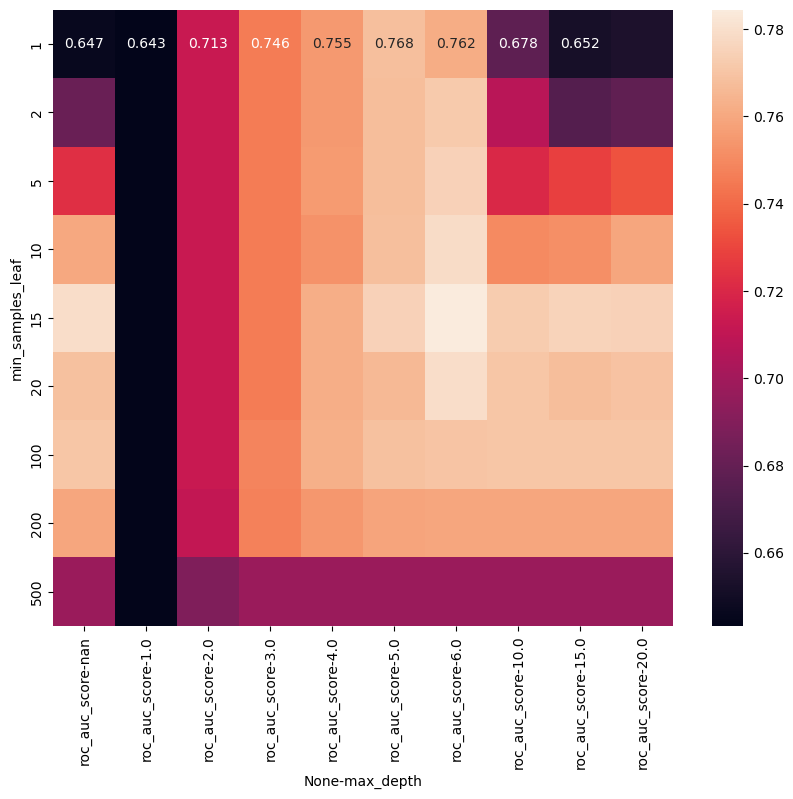

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pt_pivot, annot=True, fmt=".3f")

In [49]:
max_depth_final=6
min_samples_leaf_final=15

In [50]:
dt = DecisionTreeClassifier(max_depth=max_depth_final, min_samples_leaf=min_samples_leaf_final)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [51]:
y_val_prob = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, dt.predict_proba(X_val)[:,1]), roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])

(0.7849608689108513, 0.85987366505368)

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [55]:
rf.predict_proba(X_val[[1]])

array([[1., 0.]])

In [56]:
y_prob = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_prob)

0.7847946872021272

In [57]:
aucs=[]
for n in tqdm(range(10, 201, 10), total=len(range(10, 201, 10))):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_prob = rf.predict_proba(X_val)[:,1]
    aucs.append((n, roc_auc_score(y_val, y_prob)))

df_scores = pd.DataFrame(aucs, columns=["n_estimators", "auc"])
df_scores.sort_values('auc', ascending=False).head()

  0%|          | 0/20 [00:00<?, ?it/s]

,n_estimators,auc
14,150,0.824612
13,140,0.823565
18,190,0.823490
17,180,0.823481
19,200,0.823117


D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


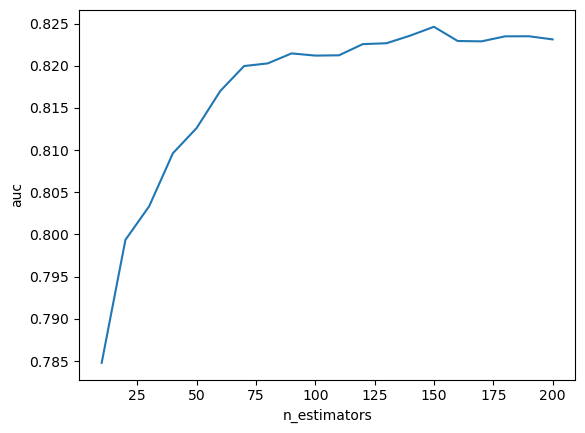

In [58]:
sns.lineplot(df_scores, x='n_estimators', y='auc')
plt.show()

In [59]:
aucs=[]
for d in tqdm([5,10,15], total=3):
    print(f"max_depth = {d}")
    for n in tqdm(range(10, 201, 10), total=len(range(10, 201, 10))):
        rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=d, n_jobs=10)
        rf.fit(X_train, y_train)

        y_prob = rf.predict_proba(X_val)[:,1]
        aucs.append((d, n, roc_auc_score(y_val, y_prob)))

df_scores = pd.DataFrame(aucs, columns=["max_depth", "n_estimators", "auc"])
df_scores.sort_values('auc', ascending=False).head()

  0%|          | 0/3 [00:00<?, ?it/s]

max_depth = 5


  0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 10


  0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 15


  0%|          | 0/20 [00:00<?, ?it/s]

,max_depth,n_estimators,auc
39,10,200,0.828225
38,10,190,0.827666
37,10,180,0.827347
35,10,160,0.826970
31,10,120,0.826826


D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

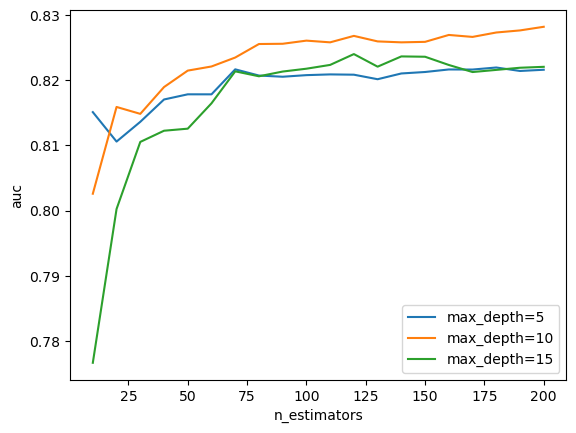

,max_depth,n_estimators,auc
0,5,10,0.815121
5,5,60,0.817852
10,5,110,0.820913
15,5,160,0.821671
20,10,10,0.802592
25,10,60,0.822129
30,10,110,0.825835
35,10,160,0.826970
40,15,10,0.776636
45,15,60,0.816473


In [60]:
for d in [5,10,15]:
    sns.lineplot(df_scores[df_scores.max_depth == d], x='n_estimators', y='auc', label=f"max_depth={d}")
plt.show()
df_scores.loc[::5]

In [61]:
max_depth_final_rf=10

In [62]:
aucs=[]
for s in tqdm([1,3,5, 10, 50], total=5, desc="Main"):
    print(f"max_depth = {d}")
    for n in tqdm(range(10, 201, 10), total=len(range(10, 201, 10)), desc=f"For msl={s}"):
        rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=max_depth_final_rf, min_samples_leaf=s, n_jobs=10)
        rf.fit(X_train, y_train)

        y_prob = rf.predict_proba(X_val)[:,1]
        aucs.append((s, n, roc_auc_score(y_val, y_prob)))

df_scores = pd.DataFrame(aucs, columns=["min_samples_leaf", "n_estimators", "auc"])
df_scores.sort_values('auc', ascending=False).head()

Main:   0%|          | 0/5 [00:00<?, ?it/s]

max_depth = 15


For msl=1:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 15


For msl=3:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 15


For msl=5:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 15


For msl=10:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth = 15


For msl=50:   0%|          | 0/20 [00:00<?, ?it/s]

,min_samples_leaf,n_estimators,auc
26,3,70,0.831554
28,3,90,0.831090
30,3,110,0.830946
29,3,100,0.830752
31,3,120,0.830702


D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

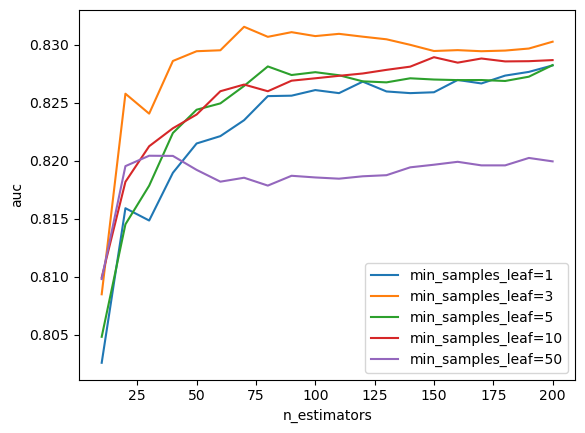

In [63]:
for s in [1,3,5, 10, 50]:
    sns.lineplot(df_scores[df_scores.min_samples_leaf == s], x='n_estimators', y='auc', label=f"min_samples_leaf={s}")
plt.show()

In [64]:
min_samples_leaf_final_rf=3

In [65]:
aucs=[]
for n in tqdm(range(10, 201, 10), total=len(range(10, 201, 10))):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=max_depth_final_rf, min_samples_leaf=min_samples_leaf_final_rf)
    rf.fit(X_train, y_train)

    y_prob = rf.predict_proba(X_val)[:,1]
    aucs.append((n, roc_auc_score(y_val, y_prob)))

df_scores = pd.DataFrame(aucs, columns=["n_estimators", "auc"])
df_scores.sort_values('auc', ascending=False).head()

  0%|          | 0/20 [00:00<?, ?it/s]

,n_estimators,auc
6,70,0.831554
8,90,0.831090
10,110,0.830946
9,100,0.830752
11,120,0.830702


In [66]:
n_estimators_final=70

In [67]:
max_depth_final_rf, min_samples_leaf_final_rf, n_estimators_final

(10, 3, 70)

In [68]:
rf = RandomForestClassifier(n_estimators=n_estimators_final, random_state=42, max_depth=max_depth_final_rf, min_samples_leaf=min_samples_leaf_final_rf, n_jobs=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=70,
                       n_jobs=10, random_state=42)

In [69]:
y_prob = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_prob)

0.8315544574323984

In [70]:
y_prob = rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_prob)

0.9580318976341295

### Gradient Boosting and XGBoost

In [72]:
!pip install xgboost

In [73]:
import xgboost as xgb

In [74]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [75]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': "binary:logistic",
    'nthread': 8,
    
    'seed': 42,
    'verbosity': 1
}

model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=20)

In [76]:
roc_auc_score(y_val,model.predict(dval))

0.8326236642753224

In [77]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [78]:
# No need for that
def parse_output(output):
    scores = []
    for line in output.stdout.split("\n"):
        sp = line.split('\t')
        if len(sp) < 3:
            continue
        rd = int(sp[0].strip('[]'))
        train_auc = float(sp[1].split(":")[1])
        val_auc = float(sp[2].split(":")[1])
        scores.append([rd, train_auc, val_auc])
    return pd.DataFrame(scores, columns=["num_boost_round", "train_auc", "val_auc"])

### Parameter tuning

#### ETA tuning

In [81]:
eta_scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, .9, 1]

In [82]:
%%capture _

score_results = {}

for eta in etas:
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': "binary:logistic",
        'eval_metric': 'auc',
        'nthread': 8,

        'seed': 42,
        'verbosity': 0
    }

    model = xgb.train(params=xgb_params, evals=watchlist, dtrain=dtrain, num_boost_round=200, evals_result=score_results)
    
    columns = ['num_boost_round', 'train_auc', 'val_auc']
    train_aucs = list(score_results['train'].values())[0]
    val_aucs = list(score_results['val'].values())[0]

    df_scores = pd.DataFrame(
        list(zip(
            range(1, len(train_aucs) + 1),
            train_aucs,
            val_aucs
        )), columns=columns)
    eta_scores[eta] = df_scores

In [83]:
eta_scores.keys()

dict_keys([0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1])

In [84]:
colors = {1: 'black', 0.1: "green", 0.3: "orange", 0.5: "red", 0.01: "cyan", 0.05: "blue", 0.9: "lightblue", 0.7: "skyblue"}
def show_eta_scores(etas):
    plt.title("eta")
    for eta in etas:
        dscores = eta_scores[eta]
        sns.lineplot(dscores, x="num_boost_round", y="val_auc", label=eta, color=colors[eta]) 
    plt.show()

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

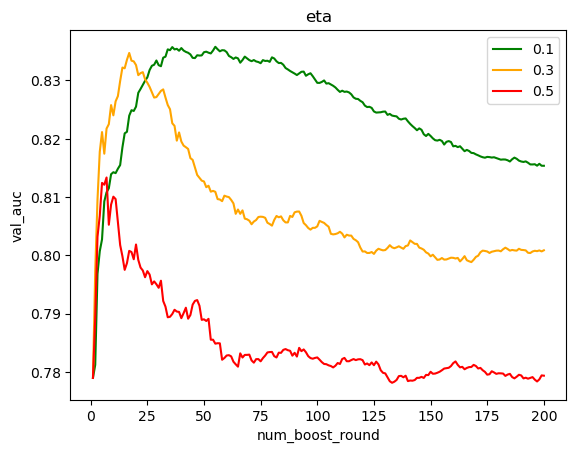

In [85]:
show_eta_scores([0.1, 0.3, 0.5])

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

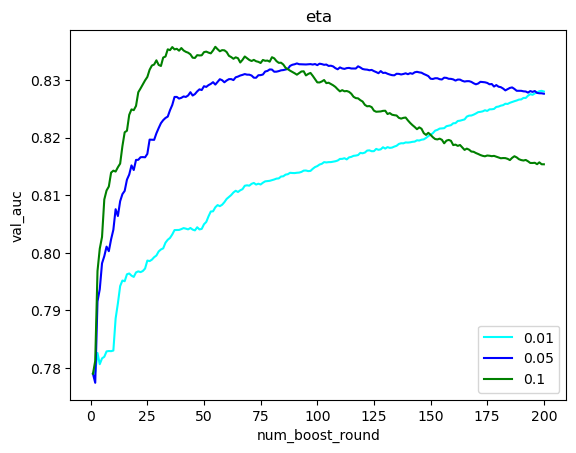

In [86]:
show_eta_scores([0.01, 0.05, 0.1])

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

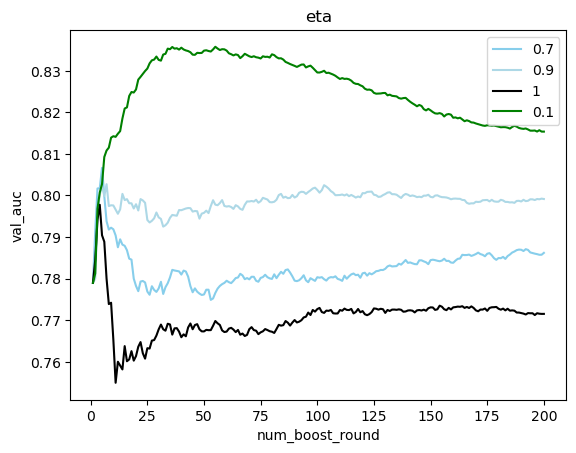

In [87]:
show_eta_scores([0.7, 0.9, 1, 0.1])

In [88]:
eta_best = 0.1

#### Max depth tuning

In [90]:
max_depth_scores = {}
max_depths = [2, 3,4,6,10]

In [91]:
%%capture _

score_results = {}

for max_depth in max_depths:
    xgb_params = {
        'eta': eta_best,
        'max_depth': max_depth,
        'min_child_weight': 1,

        'objective': "binary:logistic",
        'eval_metric': 'auc',
        'nthread': 8,

        'seed': 42,
        'verbosity': 0
    }

    model = xgb.train(params=xgb_params, evals=watchlist, dtrain=dtrain, num_boost_round=200, evals_result=score_results)
    
    columns = ['num_boost_round', 'train_auc', 'val_auc']
    train_aucs = list(score_results['train'].values())[0]
    val_aucs = list(score_results['val'].values())[0]

    df_scores = pd.DataFrame(
        list(zip(
            range(1, len(train_aucs) + 1),
            train_aucs,
            val_aucs
        )), columns=columns)
    max_depth_scores[max_depth] = df_scores

In [92]:
max_depth_scores.keys()

dict_keys([2, 3, 4, 6, 10])

In [93]:
colors = {3: 'black', 4: "green", 6: "orange", 10: "red", 2: "cyan", 0.05: "blue", 0.9: "black", 0.7: "skyblue"}
def show_max_depth_scores(max_depths, ylim):
    plt.title("Max depth")
    for max_depth in max_depths:
        dscores = max_depth_scores[max_depth]
        sns.lineplot(dscores, x="num_boost_round", y="val_auc", label=max_depth, color=colors[max_depth]) 
    plt.ylim(ylim)
    plt.show()

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

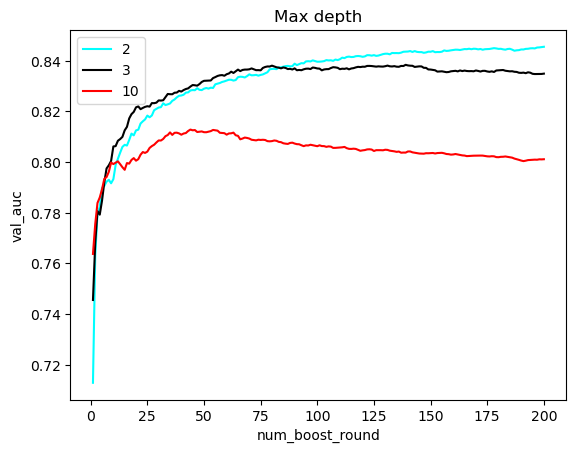

In [94]:
show_max_depth_scores([2, 3,10], None)

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

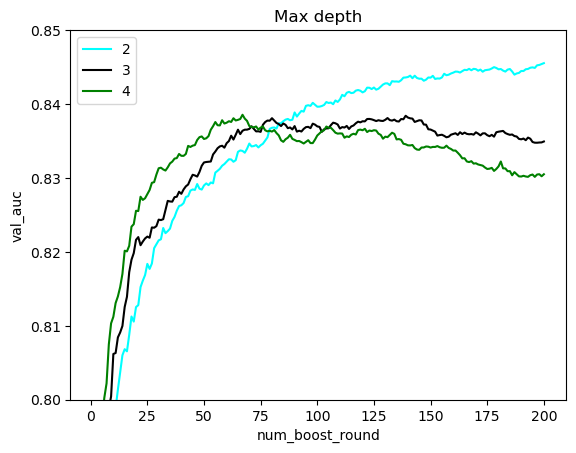

In [95]:
show_max_depth_scores([2, 3,4], (0.8, 0.85))

In [96]:
max_depth_final = 3

#### Min Child weight tuning

In [98]:
min_child_weight_scores = {}
min_child_weights = [1, 10, 30, 100]

In [99]:
%%capture _

score_results = {}

for min_child_weight in min_child_weights:
    xgb_params = {
        'eta': eta_best,
        'max_depth': max_depth_final,
        'min_child_weight': min_child_weight,

        'objective': "binary:logistic",
        'eval_metric': 'auc',
        'nthread': 8,

        'seed': 42,
        'verbosity': 0
    }

    model = xgb.train(params=xgb_params, evals=watchlist, dtrain=dtrain, num_boost_round=200, evals_result=score_results)
    
    columns = ['num_boost_round', 'train_auc', 'val_auc']
    train_aucs = list(score_results['train'].values())[0]
    val_aucs = list(score_results['val'].values())[0]

    df_scores = pd.DataFrame(
        list(zip(
            range(1, len(train_aucs) + 1),
            train_aucs,
            val_aucs
        )), columns=columns)
    min_child_weight_scores[min_child_weight] = df_scores

In [100]:
min_child_weight_scores.keys()

dict_keys([1, 10, 30, 100])

In [101]:
colors = {1: 'black', 10: "green", 30: "orange", 100: "red", 2: "cyan", 0.05: "blue", 0.9: "black", 0.7: "skyblue"}
def show_min_child_weight(min_child_weights, ylim=None):
    plt.title("Min child weight")
    for min_child_weight in min_child_weights:
        dscores = min_child_weight_scores[min_child_weight]
        sns.lineplot(dscores, x="num_boost_round", y="val_auc", label=min_child_weight, color=colors[min_child_weight]) 
    plt.ylim(ylim)
    plt.show()

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

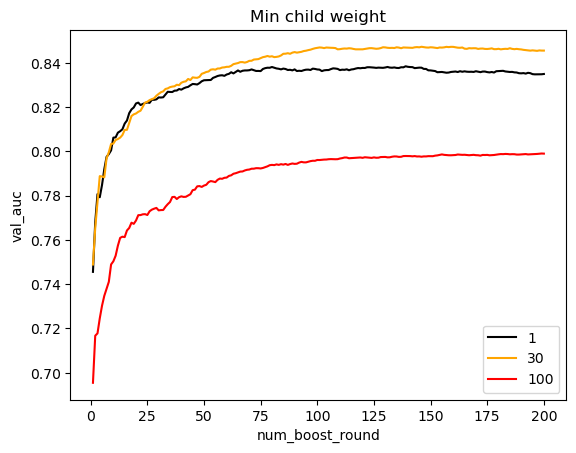

In [102]:
show_min_child_weight([1, 30, 100])

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

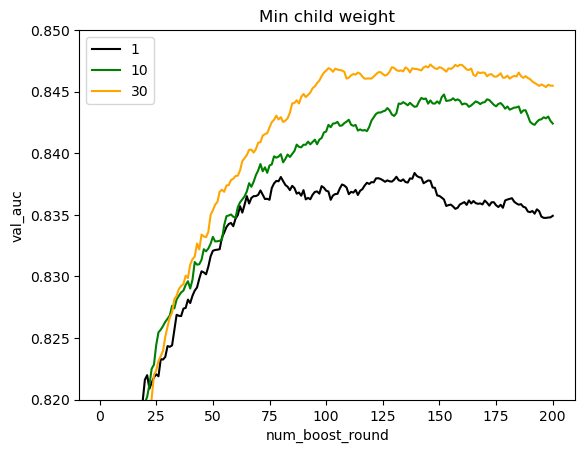

In [103]:
show_min_child_weight([1, 10, 30], (0.82, 0.85))

In [104]:
min_child_weight_final = 30
num_boost_round_final = 100

### Final model

#### Final DecisionTreeClassifier

In [107]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val  = dv.transform(val.to_dict(orient='records'))
X_test  = dv.transform(test.to_dict(orient='records'))

In [108]:
dt_final = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [109]:
roc_auc_score(y_val, dt_final.predict_proba(X_val)[:,1]), roc_auc_score(y_test, dt_final.predict_proba(X_test)[:,1])

(0.7848918878242112, 0.7946211853422883)

#### Final RandomForestClassifier

In [111]:
rf_final = RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=70, random_state=42, n_jobs=10)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=70,
                       n_jobs=10, random_state=42)

In [112]:
roc_auc_score(y_val, rf_final.predict_proba(X_val)[:,1]), roc_auc_score(y_test, rf_final.predict_proba(X_test)[:,1])

(0.8315544574323984, 0.8338340992105574)

#### Final XGBoost model

In [114]:
%%capture output

score_results = {}

xgb_params_final = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': "binary:logistic",
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 42,
    'verbosity': 1
}

model = xgb.train(params=xgb_params, evals=watchlist, dtrain=dtrain, num_boost_round=200, evals_result=score_results)

In [115]:
dtest = xgb.DMatrix(X_test,feature_names=features)
roc_auc_score(y_val, model_final.predict(dval).tolist()), roc_auc_score(y_test, model_final.predict(dtest).tolist())

NameError: name 'model_final' is not defined

In [ ]:
columns = ['num_boost_round', 'train_auc', 'val_auc']
train_aucs = list(score_results['train'].values())[0]
val_aucs = list(score_results['val'].values())[0]

dscores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

sns.lineplot(dscores, x="num_boost_round", y="val_auc", label="Final model")
# plt.ylim(0.82, 0.85)
plt.show()

---

### Final XGBoost model

In [ ]:
full_train_final = full_train.reset_index(drop=True)
y_full_train = (full_train_final.status == "default").astype(int).values
del full_train_final["status"]

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(full_train_final.to_dict(orient='records'))

In [ ]:
X_test = dv.transform(test.to_dict(orient='records'))

In [ ]:
dfulltrain = xgb.DMatrix(X_train_full, label=y_full_train, feature_names=dv.get_feature_names_out().tolist())

In [ ]:
X_test.shape, y_test.shape, len(dv.get_feature_names_out().tolist())

In [ ]:
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [131]:
xgb_params_final = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': "binary:logistic",
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 42,
    'verbosity': 1
}

model_final = xgb.train(params=xgb_params_final, dtrain=dfulltrain, num_boost_round=100)

score_results = {}



NameError: name 'dfulltrain' is not defined

In [123]:
roc_auc_score(y_test, model_final.predict(dtest).tolist())

NameError: name 'model_final' is not defined